## 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold,cross_val_score

from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [2]:
company = pd.read_csv('Company_Data.csv')

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Data Understanding

In [4]:
company.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [6]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## 4. Data Preparation

In [7]:
label_encoder = LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [8]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


### DATA VISUALIZATION

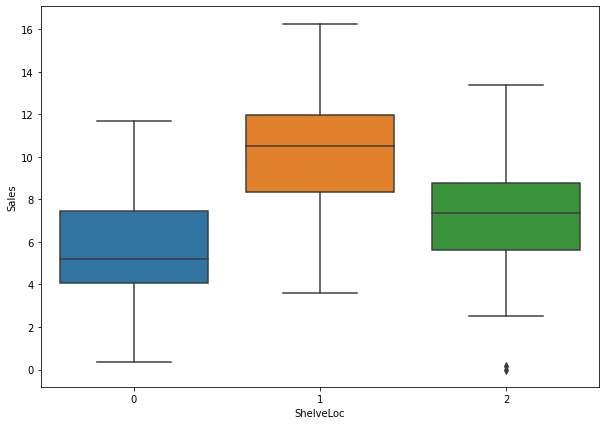

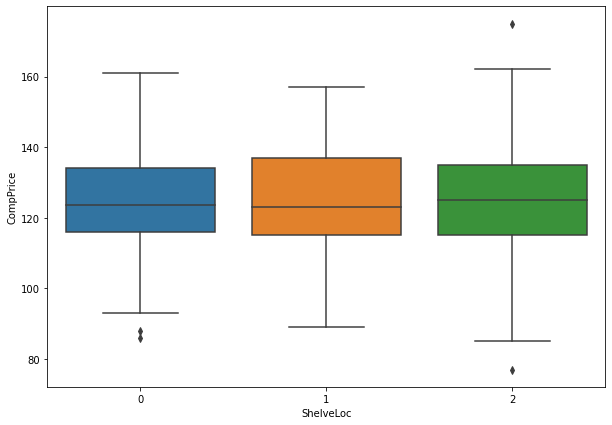

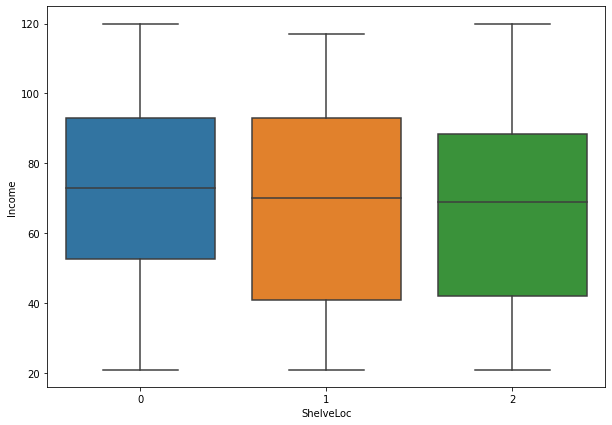

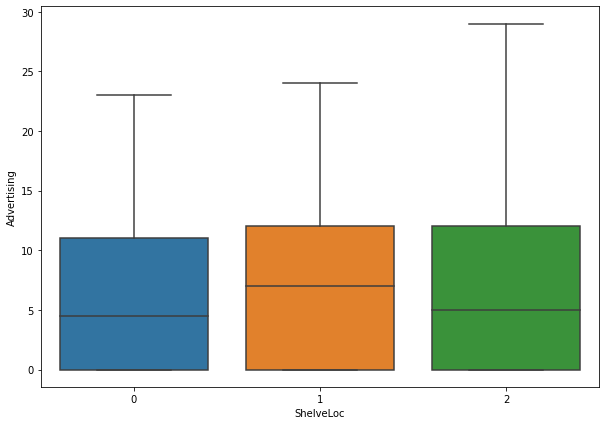

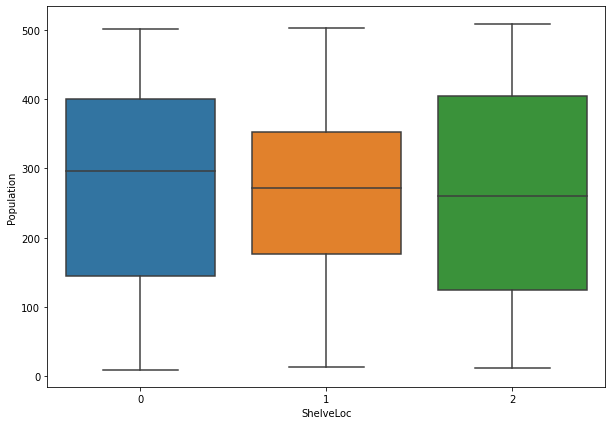

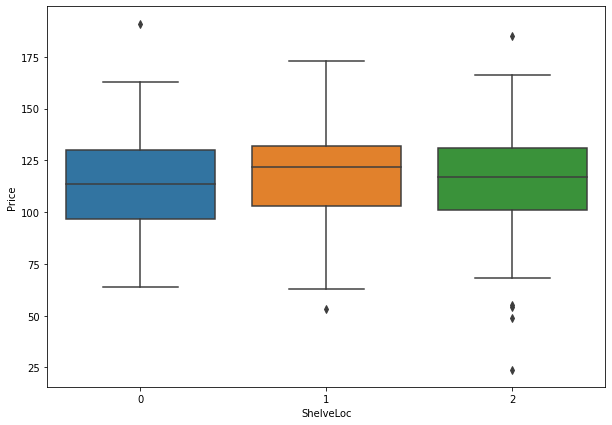

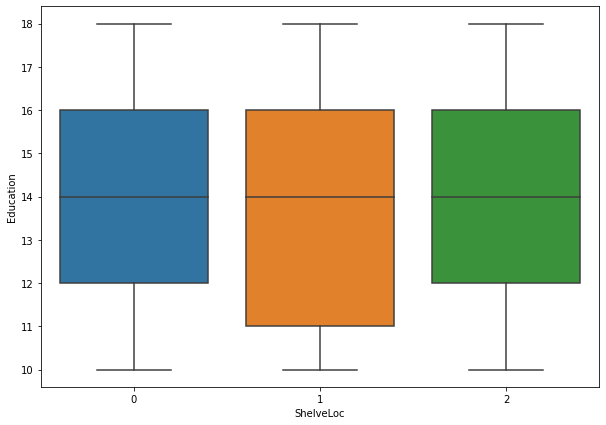

In [8]:
x = ['Sales','CompPrice','Income','Advertising','Population','Price','Education']
for i in x:
    plt.figure(figsize=(10,7))
    sns.boxplot(y=i,x='ShelveLoc',data=company,orient='v')
    plt.show()


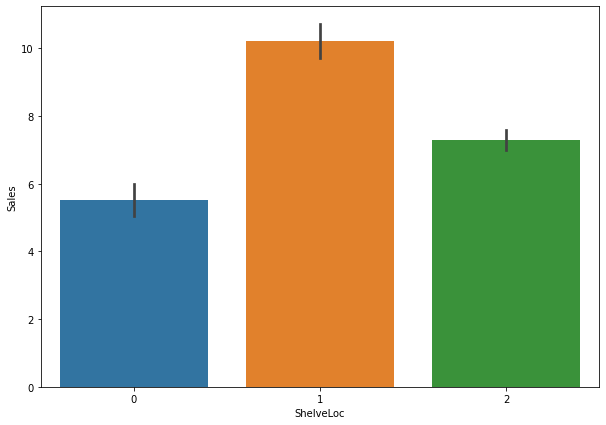

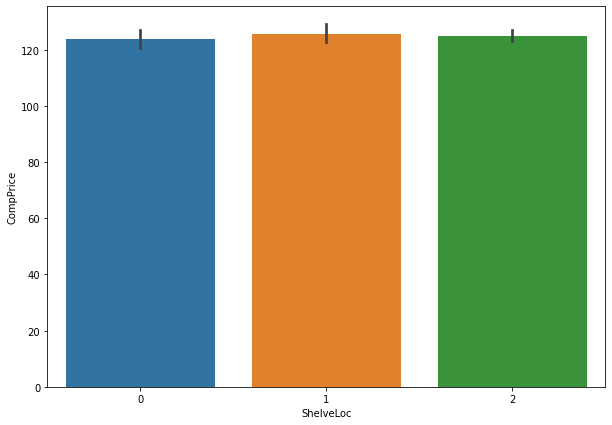

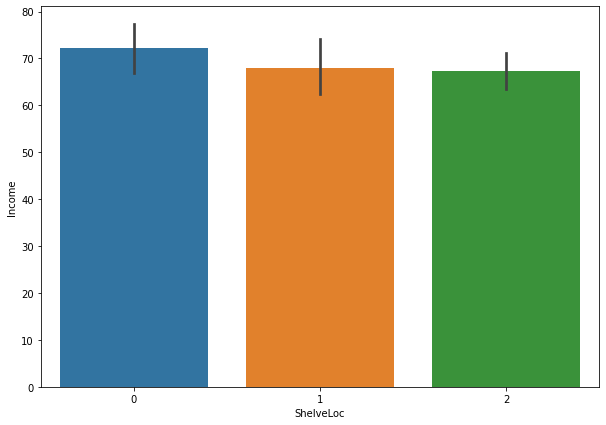

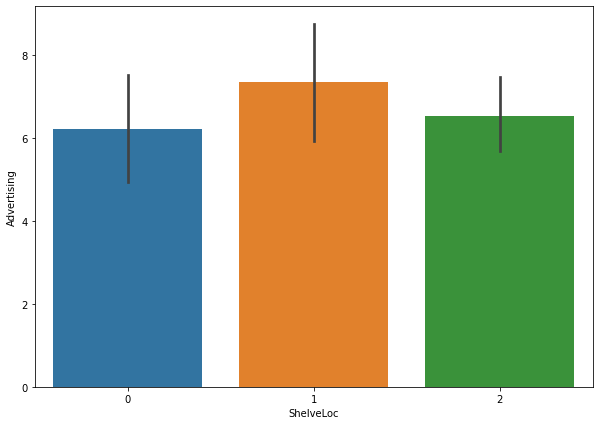

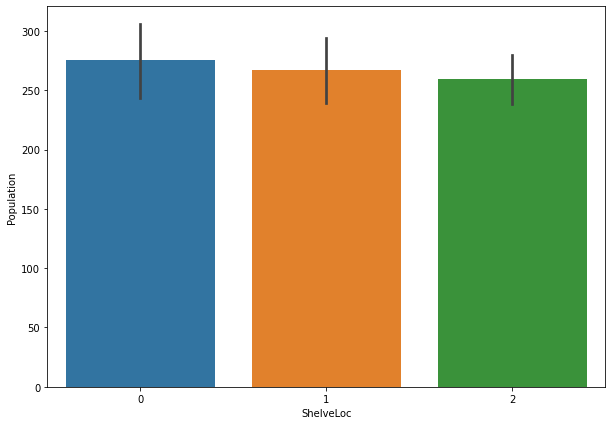

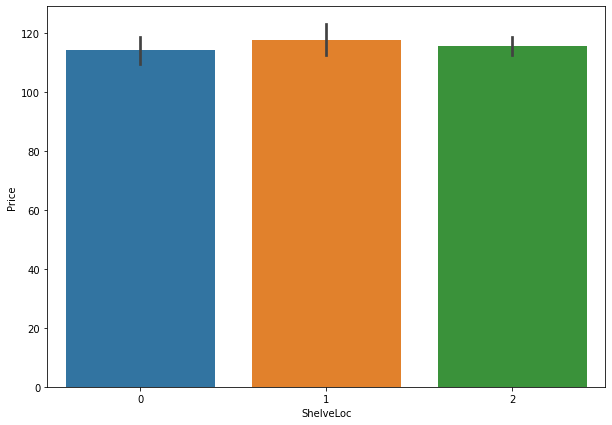

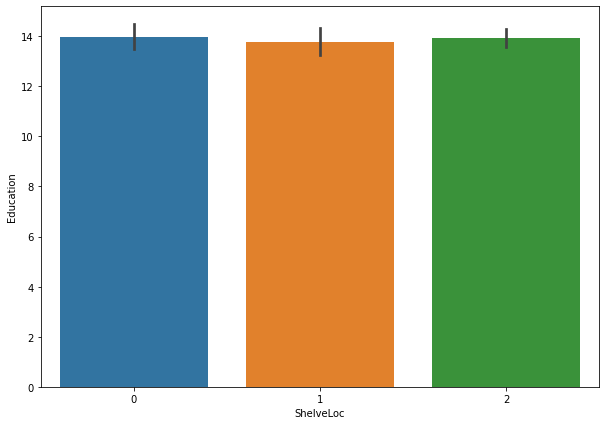

In [16]:
x = ['Sales','CompPrice','Income','Advertising','Population','Price','Education']
for i in x:
    plt.figure(figsize=(10,7))
    sns.barplot(y=i,x='ShelveLoc',data=company,orient='v')
    plt.show()

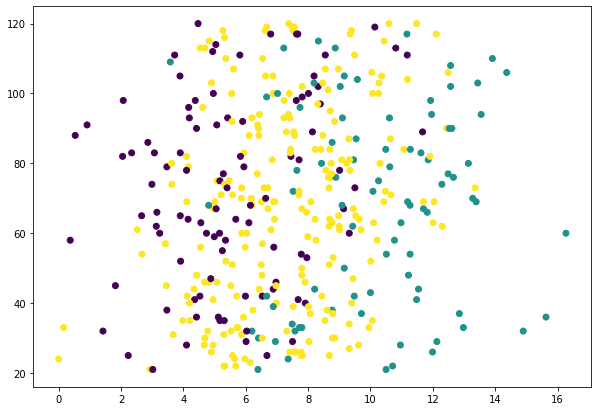

In [12]:
plt.figure(figsize=(10,7))
plt.scatter('Sales','Income',c='ShelveLoc',data=company)
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Count'>

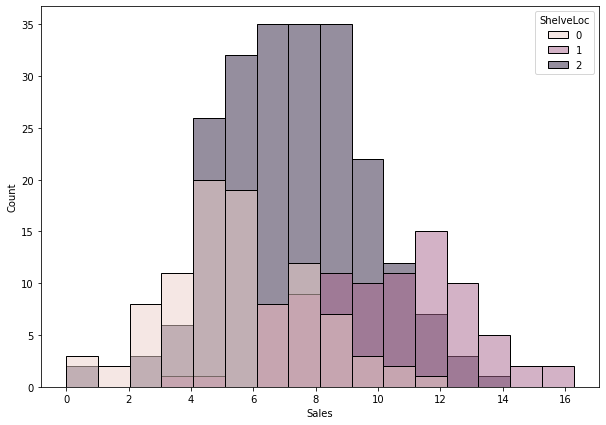

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(x='Sales',hue='ShelveLoc',data=company)

<AxesSubplot:xlabel='Population', ylabel='Income'>

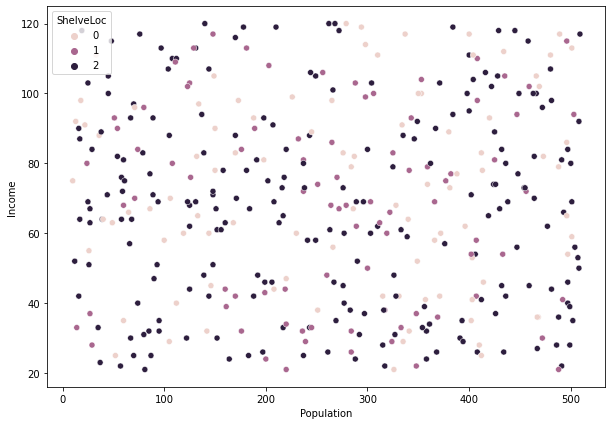

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Population', y='Income', hue='ShelveLoc', data=company )

## 5. Model Building

In [11]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [12]:
x.shape, y.shape

((400, 6), (400,))

### MODEL VALIDATION TECHNIQUES

####  Train - Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [14]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price
3,7.40,117,100,4,466,97
18,13.91,110,110,0,408,68
202,4.10,121,78,4,413,130
250,9.16,137,105,10,435,156
274,7.22,135,93,2,67,119
...,...,...,...,...,...,...
71,6.50,148,51,16,148,150
106,0.16,102,33,0,217,139
270,11.99,119,26,0,284,89
348,12.57,132,102,20,459,107


## 6. Model Training

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [16]:
model.score(x_train,y_train)

0.765625

In [17]:
model.score(x_test,y_test)

0.5

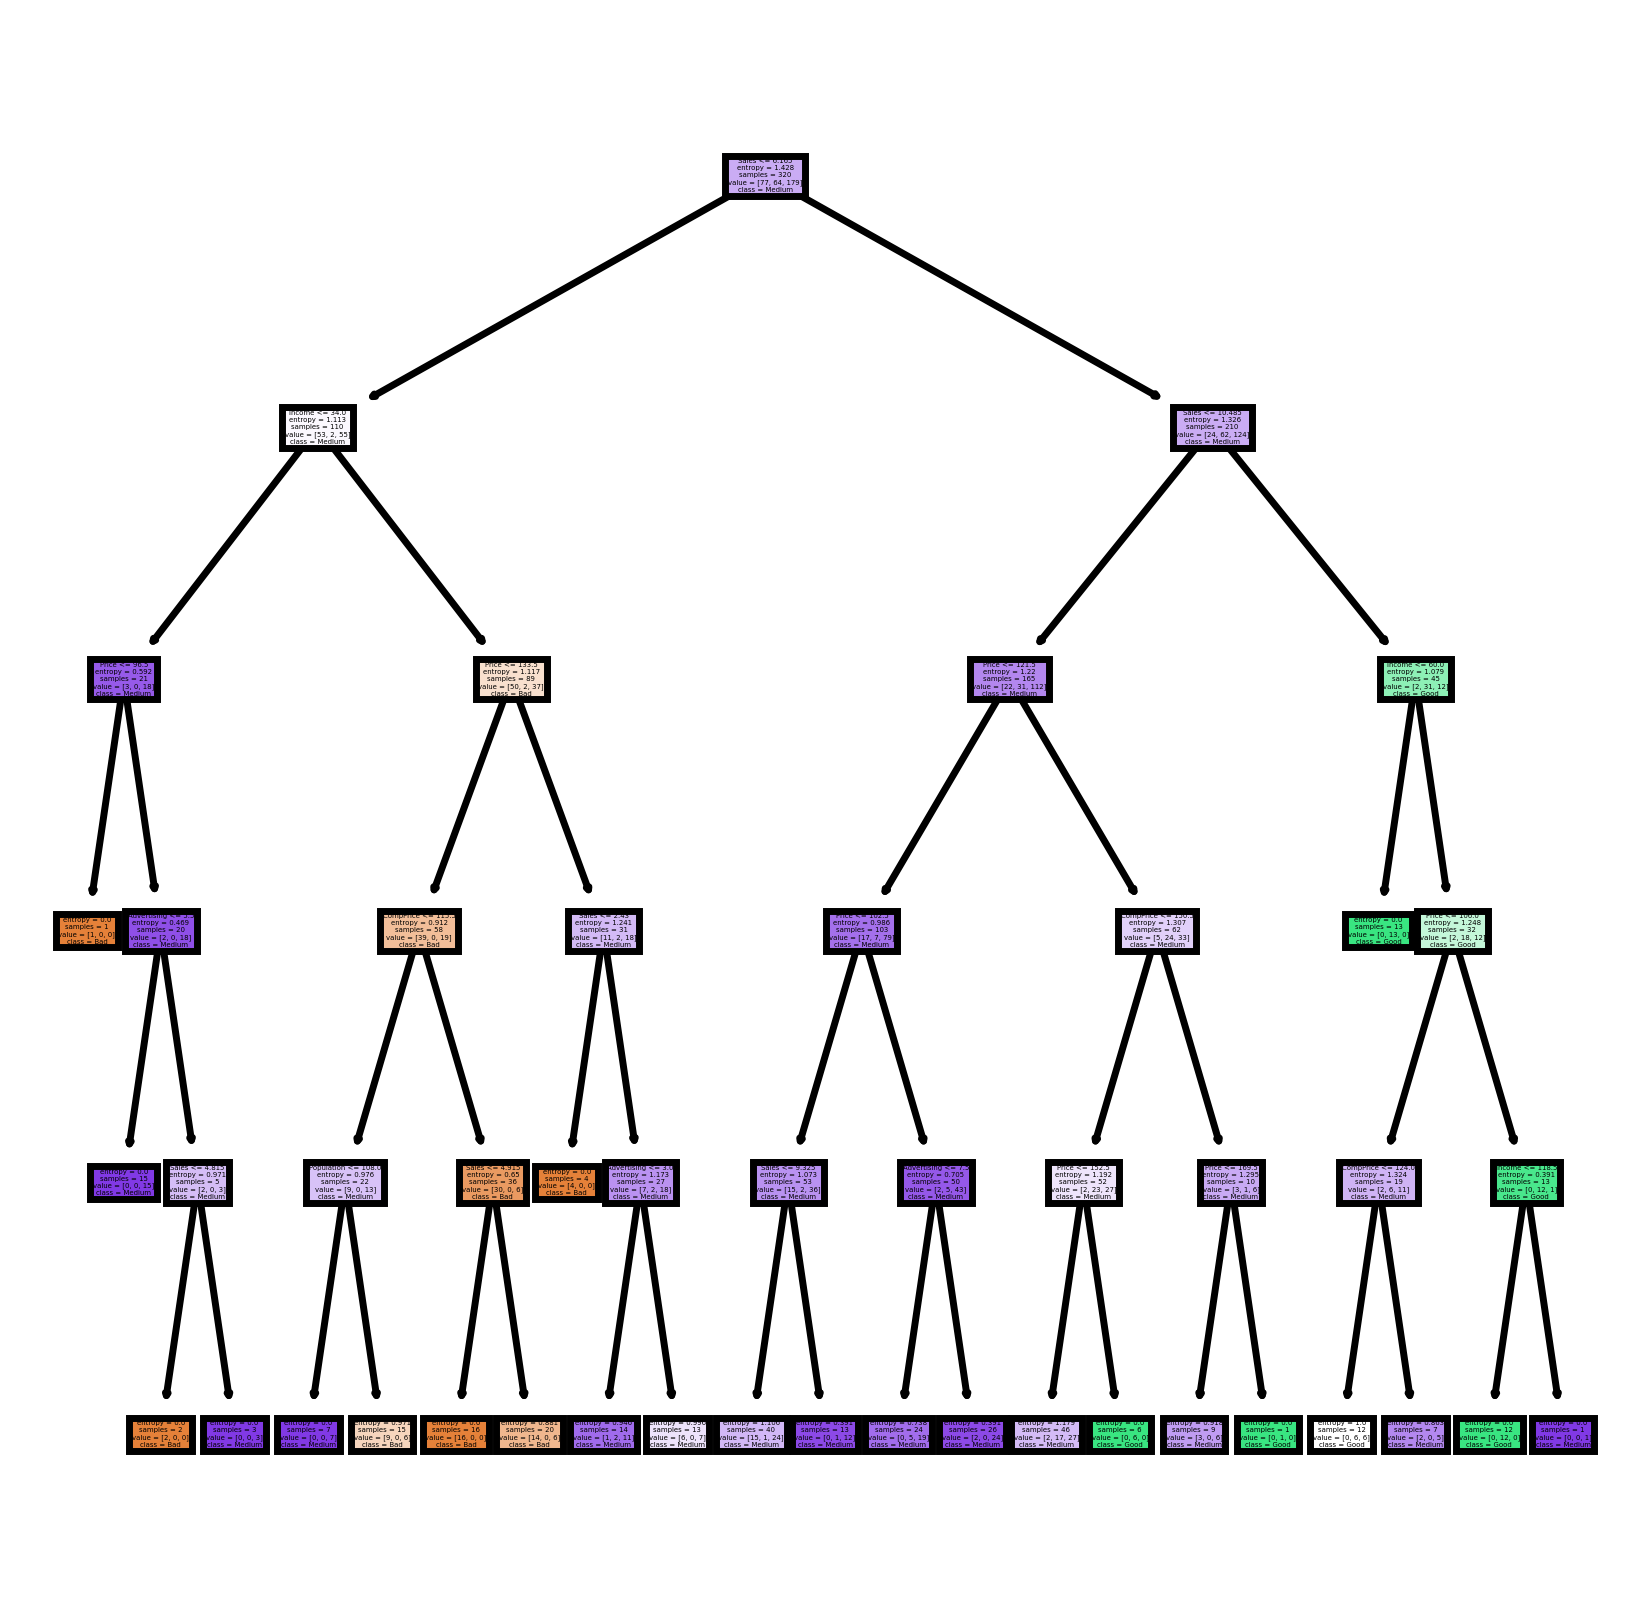

In [18]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
params = {
    'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'max_features':["sqrt","auto","log2", 0.2, None]
}
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=10)


In [21]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
                         'max_features': ['sqrt', 'auto', 'log2', 0.2, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [21]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 20}

In [22]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, max_features=None, min_samples_leaf=20)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

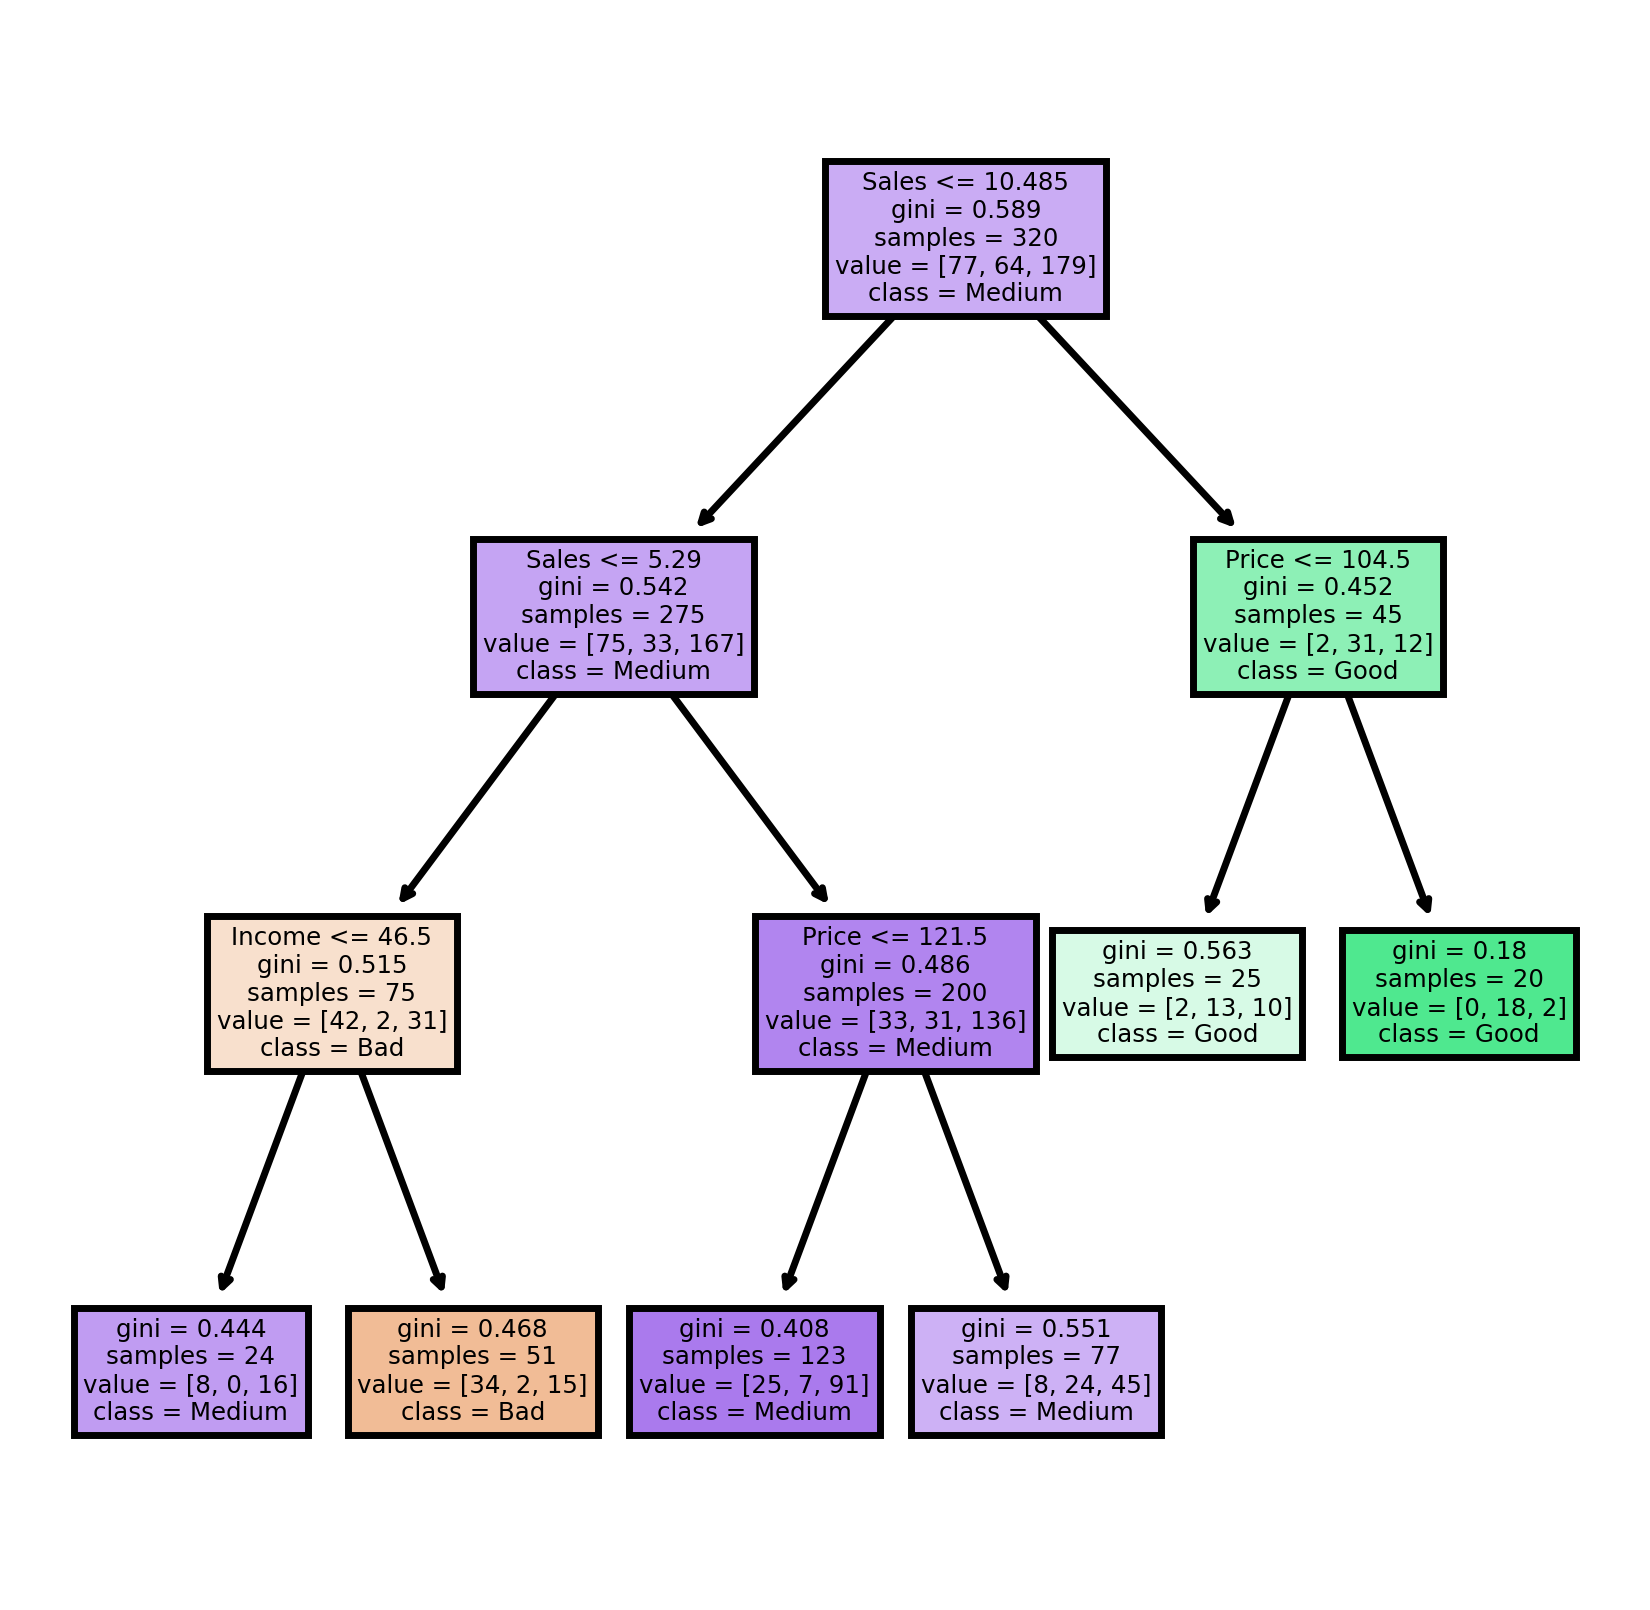

In [23]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
model1.score(x_train,y_train)

0.678125

In [25]:
model1.score(x_test,y_test)

0.625

In [26]:
preds = model1.predict(x_test)                  # predicting on test data set 
pd.Series(preds).value_counts()  

2    53
1    17
0    10
dtype: int64

In [27]:
confusion_matrix(y_pred=preds,y_true=y_test)

array([[ 5,  1, 13],
       [ 0, 13,  8],
       [ 5,  3, 32]], dtype=int64)

In [28]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        19
           1       0.76      0.62      0.68        21
           2       0.60      0.80      0.69        40

    accuracy                           0.62        80
   macro avg       0.62      0.56      0.57        80
weighted avg       0.62      0.62      0.61        80



## Kfold cross-val score

In [29]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore = cross_val_score(estimator=model1, X=x_train, y=y_train, cv=k_fold)

In [30]:
cvscore

array([0.75   , 0.6875 , 0.53125, 0.625  , 0.625  , 0.46875, 0.5    ,
       0.75   , 0.5625 , 0.71875])

In [31]:
cvscore.mean(),cvscore.std()

(0.621875, 0.09827615745947743)

## Bagging classifier

In [43]:
b_model = BaggingClassifier(base_estimator=model1)

In [44]:
b_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        min_samples_leaf=20))

In [34]:
b_model.score(x_train,y_train)

0.6875

In [35]:
b_model.score(x_test,y_test)

0.65

In [46]:
preds =b_model.predict(x_test)                  # predicting on test data set 
pd.Series(preds).value_counts()  

2    49
1    17
0    14
dtype: int64

In [47]:
confusion_matrix(y_pred=preds,y_true=y_test)

array([[ 8,  1, 10],
       [ 0, 13,  8],
       [ 6,  3, 31]], dtype=int64)

In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.42      0.48        19
           1       0.76      0.62      0.68        21
           2       0.63      0.78      0.70        40

    accuracy                           0.65        80
   macro avg       0.66      0.61      0.62        80
weighted avg       0.65      0.65      0.64        80



## Kfold cross-val score

In [38]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore = cross_val_score(estimator=b_model, X=x_train, y=y_train, cv=k_fold)

In [39]:
cvscore

array([0.78125, 0.6875 , 0.65625, 0.59375, 0.53125, 0.46875, 0.5    ,
       0.71875, 0.5625 , 0.625  ])

In [40]:
cvscore.mean(),cvscore.std()

(0.6125, 0.09499177595981664)